# A window functions are function where the input values are taken from a "window" of one or more rows in a series or table and calculation is performed over them 

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_excel('Sample - Superstore.xls')
data['OrderDateMonth']=data['Order Date'].apply(lambda x: x.month)
data['OrderDateYear']=data['Order Date'].apply(lambda x: x.year)
salesMonthYear=pd.pivot_table(data,index=['OrderDateMonth'],columns=['OrderDateYear'],aggfunc='sum',values='Sales')

In [5]:
salesMonthYear

OrderDateYear,2014,2015,2016,2017
OrderDateMonth,,,,
1,14236.8950,18174.0756,18542.4910,43971.3740
2,4519.8920,11951.4110,22978.8150,20301.1334
3,55691.0090,38726.2520,51715.8750,58872.3528
4,28295.3450,34195.2085,38750.0390,36521.5361
5,23648.2870,30131.6865,56987.7280,44261.1102
6,34595.1276,24797.2920,40344.5340,52981.7257
7,33946.3930,28765.3250,39261.9630,45264.4160
8,27909.4685,36898.3322,31115.3743,63120.8880
9,81777.3508,64595.9180,73410.0249,87866.6520


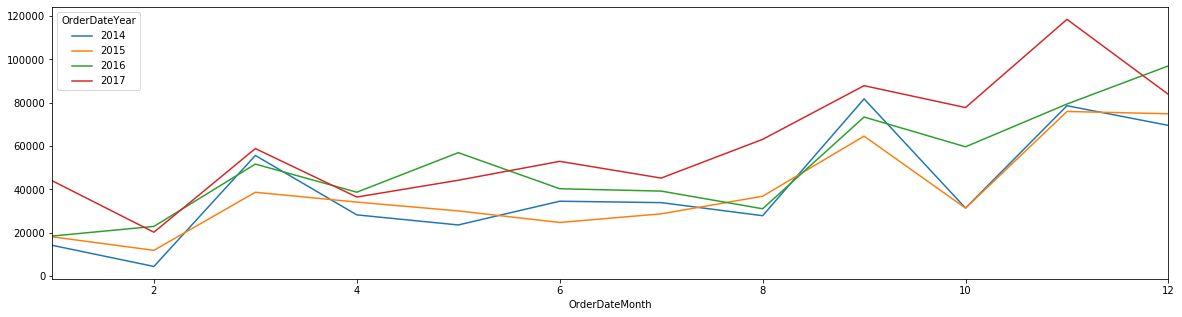

In [4]:
salesMonthYear.plot(figsize=(20,5))

# Windows Functions

## Rolling

In [6]:
rObject=salesMonthYear.rolling(2)

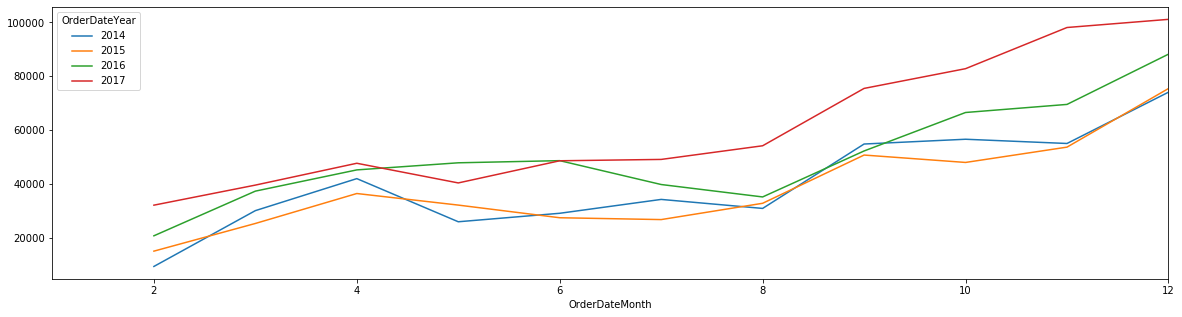

In [9]:
rObject.mean().plot(figsize=(20,5))

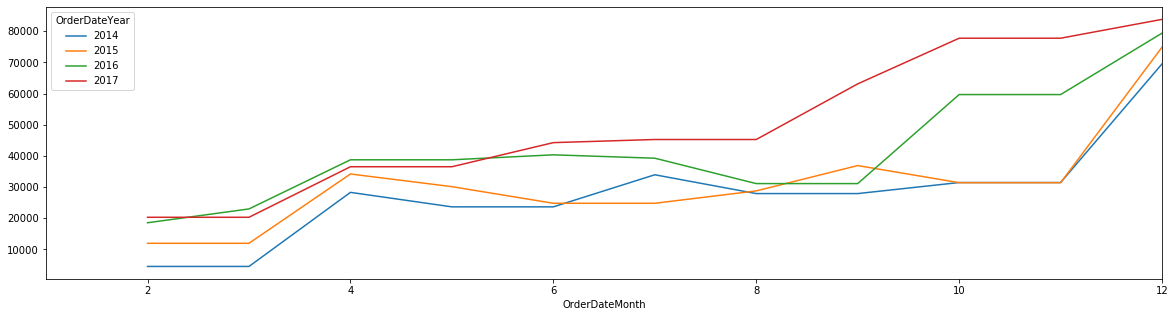

In [11]:
rObject.min().plot(figsize=(20,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028AC12A8630>,
      dtype=object)

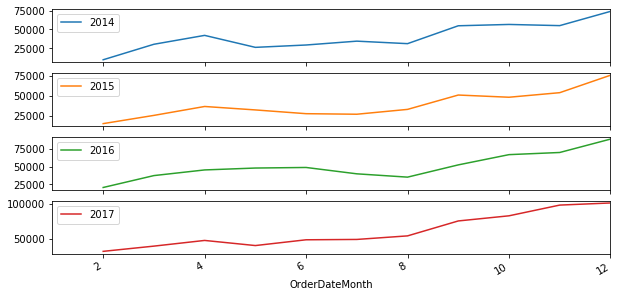

In [12]:
rObject.mean().plot(subplots=True,figsize=(10,5))

Window functions are mostly used in timeseries analysis for finding the trends, patterns. The operation smoothen the data. also if lots of data is available like sensor data, aggregation is one of the approach which are being used commonly.

## Expanding function

In [13]:
kkk=pd.DataFrame(data={'A':range(10)})

In [14]:
kkk

,A
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [20]:
expObj=kkk.expanding(center=True,min_periods=1)

In [21]:
kkk['expP1']=expObj.mean()

In [22]:
kkk

,A,expP1
0,0,2.0
1,1,2.5
2,2,3.0
3,3,3.5
4,4,4.0
5,5,4.5
6,6,5.0
7,7,5.5
8,8,6.0
9,9,6.5


# ewm (Provides exponential weighted functions)

In [26]:
kkk=pd.DataFrame(data={'A':range(10)})
expObj=kkk.ewm(halflife=.5)

In [27]:
kkk['expMean']=expObj.mean()

In [28]:
kkk

,A,expMean
0,0,0.000000
1,1,0.800000
2,2,1.714286
3,3,2.682353
4,4,3.671554
5,5,4.668132
6,6,5.667094
7,7,6.666789
8,8,7.666701
9,9,8.666676
